In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold

In [89]:
#load files
df = pd.read_csv('apartments_pl_2024_01.csv')


#join files
#df.conact()

#drop observations
df = df.dropna()

#convert to numerical data
df['condition'] = df['condition'].map({'low': 0, 'premium': 1})
df['type'] = df['type'].map({'apartmentBuilding': 1, 'blockOfFlats': 2, 'tenement': 3})
for col in ['hasParkingSpace', 'hasBalcony', 'hasElevator', 'hasSecurity', 'hasStorageRoom']:
    df[col] = df[col].map({'no': 0, 'yes': 1})

for col in ['hasParkingSpace', 'hasBalcony', 'hasElevator', 'hasSecurity', 'hasStorageRoom', 'condition', 'type']:
    df[col] = df[col].astype(np.int8)


#drop features
toDrop = ['id', 'ownership', 'buildingMaterial', 'city']
df = df.drop(toDrop, axis=1)

#drop low variance featurse
sel = VarianceThreshold(threshold=.05)
sel.fit(df/df.mean())
mask = sel.get_support() 
df = df.loc[:, mask]

#other things?

df

,type,squareMeters,rooms,floor,floorCount,centreDistance,poiCount,schoolDistance,clinicDistance,postOfficeDistance,...,restaurantDistance,collegeDistance,pharmacyDistance,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
0,1,105.00,4.0,3.0,4.0,5.06,1.0,1.080,0.949,0.623,...,1.054,3.062,0.335,1,0,1,1,0,0,1199999
4,2,45.50,2.0,4.0,4.0,1.65,18.0,0.250,0.624,0.510,...,0.232,0.986,0.273,0,0,0,0,0,1,363000
5,3,80.61,3.0,3.0,3.0,1.76,45.0,0.083,0.257,0.294,...,0.102,0.256,0.301,1,0,0,0,0,1,717000
6,2,70.30,3.0,9.0,11.0,3.35,14.0,0.269,1.364,0.247,...,0.388,1.589,0.194,1,0,1,1,0,1,689000
7,1,67.37,3.0,4.0,6.0,1.61,3.0,0.501,0.973,0.713,...,0.052,0.988,0.215,1,1,1,1,0,0,790000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15471,2,37.30,2.0,10.0,10.0,3.29,21.0,0.400,0.417,0.299,...,0.080,0.861,0.155,0,0,1,1,0,1,219000
15489,1,71.72,3.0,1.0,2.0,3.29,21.0,0.400,0.417,0.299,...,0.080,0.861,0.155,1,0,1,1,0,0,849000
15502,3,95.00,4.0,1.0,3.0,0.65,54.0,0.111,0.205,0.351,...,0.058,0.622,0.205,0,0,0,0,0,1,599000
15504,2,74.00,3.0,1.0,4.0,4.04,14.0,0.214,0.313,0.449,...,0.406,1.660,0.277,0,0,0,0,0,1,390000


In [90]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 1724 entries, 0 to 15509
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  1724 non-null   int8   
 1   squareMeters          1724 non-null   float64
 2   rooms                 1724 non-null   float64
 3   floor                 1724 non-null   float64
 4   floorCount            1724 non-null   float64
 5   centreDistance        1724 non-null   float64
 6   poiCount              1724 non-null   float64
 7   schoolDistance        1724 non-null   float64
 8   clinicDistance        1724 non-null   float64
 9   postOfficeDistance    1724 non-null   float64
 10  kindergartenDistance  1724 non-null   float64
 11  restaurantDistance    1724 non-null   float64
 12  collegeDistance       1724 non-null   float64
 13  pharmacyDistance      1724 non-null   float64
 14  condition             1724 non-null   int8   
 15  hasParkingSpace       172

,type,squareMeters,rooms,floor,floorCount,centreDistance,poiCount,schoolDistance,clinicDistance,postOfficeDistance,...,restaurantDistance,collegeDistance,pharmacyDistance,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
count,1724.000000,1724.000000,1724.000000,1724.000000,1724.000000,1724.000000,1724.000000,1724.000000,1724.000000,1724.000000,...,1724.000000,1724.000000,1724.000000,1724.000000,1724.000000,1724.000000,1724.000000,1724.000000,1724.000000,1.724000e+03
mean,1.888051,62.250754,2.788283,3.382831,5.551044,3.951845,23.311485,0.363413,0.868176,0.464162,...,0.284694,1.324124,0.300947,0.658353,0.421114,0.645592,0.562065,0.043503,0.490719,8.471405e+05
std,0.738382,23.134362,0.964766,2.653454,3.337167,2.682102,26.958532,0.334353,0.793733,0.362091,...,0.288212,1.051378,0.285790,0.474400,0.493881,0.478472,0.496277,0.204047,0.500059,4.598305e+05
min,1.000000,25.000000,1.000000,1.000000,1.000000,0.120000,0.000000,0.010000,0.014000,0.009000,...,0.002000,0.026000,0.006000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.870000e+05
25%,1.000000,46.000000,2.000000,2.000000,3.000000,1.790000,8.000000,0.166000,0.330000,0.233750,...,0.105000,0.509250,0.140000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.480000e+05
50%,2.000000,58.500000,3.000000,3.000000,4.000000,3.485000,15.000000,0.274000,0.621000,0.387000,...,0.204500,0.985500,0.228000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,7.500000e+05
75%,2.000000,73.502500,3.000000,4.000000,7.000000,5.580000,28.000000,0.436250,1.091250,0.588000,...,0.366250,1.930250,0.374000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000e+06
max,3.000000,150.000000,6.000000,29.000000,29.000000,16.360000,210.000000,3.059000,4.789000,3.245000,...,2.897000,4.977000,2.861000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.200000e+06


Fontconfig warning: ignoring UTF-8: not a valid region tag


<Axes: >

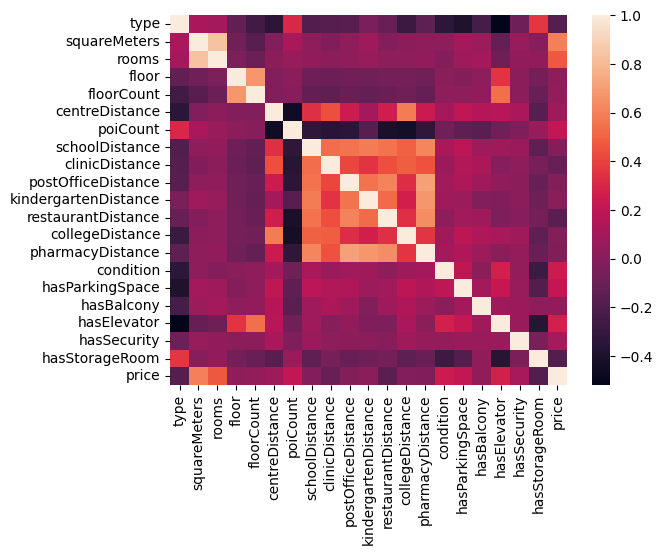

In [86]:
sns.heatmap(df.corr())

In [92]:
df.to_csv('2024_01.csv', index=False)